In [275]:
#librerias a utilizar
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt

In [276]:
# cargando datos
train_data = np.loadtxt('train_dataset.csv', delimiter=',', skiprows=1)
X_train, y_train = train_data[:1800, :9], train_data[:1800, 9]
print("X_train shape: ", X_train.shape)
print("Y_train shape: ", y_train.shape)
X_test, y_test = train_data[1800:, :9], train_data[1800:, 9]
print("X_test shape: ", X_test.shape)
print("Y_test shape: ", y_test.shape)

X_train shape:  (1800, 9)
Y_train shape:  (1800,)
X_test shape:  (493, 9)
Y_test shape:  (493,)


In [277]:
unique_train, counts_train = np.unique(y_train, return_counts=True)
unique_train, counts_train

(array([0., 1.]), array([1099,  701], dtype=int64))

In [278]:
unique_test, counts_test = np.unique(y_test, return_counts=True)
unique_test, counts_test

(array([0., 1.]), array([299, 194], dtype=int64))

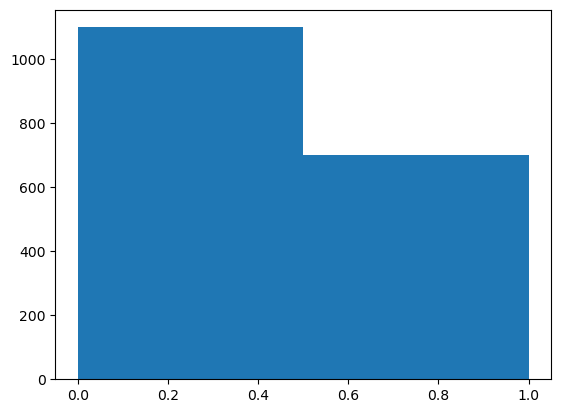

In [279]:
# distribución de clases
plt.hist(y_train, bins=2)
plt.show()

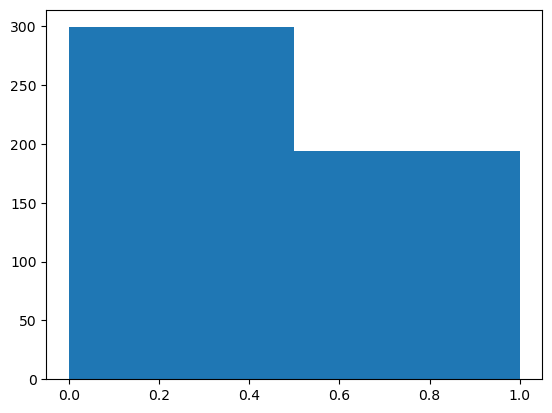

In [280]:
# distribución de clases
plt.hist(y_test, bins=2)
plt.show()

In [281]:
# funcion para normalizar las caracteristicas
def normalize_matrix(matrix):
    min_val = np.min(matrix)
    max_val = np.max(matrix)
    normalized_matrix = (matrix - min_val) / (max_val - min_val)
    return normalized_matrix

In [282]:
# normalizar los datos de training y testing
X_train = normalize_matrix(X_train)
X_test = normalize_matrix(X_test)

In [283]:
# Convertir los datos a tensores de PyTorch
X_train = torch.tensor(X_train, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32)
y_train = y_train.view(-1, 1)  # Cambiar la forma de y_train a [n_samples, 1]

X_test = torch.tensor(X_test, dtype=torch.float32)
y_test = torch.tensor(y_test, dtype=torch.float32)
y_test = y_test.view(-1, 1)

In [284]:
# Definir la clase de la red MLP
class BinaryClassifier(nn.Module):
    def __init__(self, input_size, hidden_size):
        super(BinaryClassifier, self).__init__()
        self.hidden_layer1 = nn.Linear(input_size, hidden_size)
        self.output_layer = nn.Linear(hidden_size, 1)
        
    def forward(self, x):
        hidden_output = torch.relu(self.hidden_layer1(x))
        output = torch.sigmoid(self.output_layer(hidden_output))
        return output

In [285]:
def calculate_accuracy(model, input_data, true_labels):
    # Evaluación
    with torch.no_grad():
        predicted_probs = model(input_data).squeeze()
        predicted_labels = (predicted_probs >= 0.5).float()  # Convertir a tipo float32
        correct_predictions = (predicted_labels == true_labels).sum().item()
        accuracy = correct_predictions / len(true_labels) * 100.0
        return accuracy

In [286]:
# Parámetros para la red neuronal
input_size = 9
hidden_size = 40
output_size = 1

# Crear una instancia de la red
mlp_model = BinaryClassifier(input_size, hidden_size)

# Definir función de pérdida y optimizador
criterion = nn.MSELoss()  # Usar error cuadrático medio para tareas de regresión
optimizer = optim.SGD(mlp_model.parameters(), lr=0.1)

# Entrenamiento de la red
num_epochs = 100

# guardar la pérdida para cada época
h_loss = []
h_acc = []

for epoch in range(num_epochs):
    optimizer.zero_grad()
    outputs = mlp_model(X_train)
    loss = criterion(outputs.squeeze(), y_train)  # Squeeze para hacer que las formas coincidan
    loss.backward()
    optimizer.step()

    if (epoch + 1) % 10 == 0:
        accuracy = calculate_accuracy(mlp_model, X_train, y_train)
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}, Accuracy: {accuracy:.2f}%')

    h_loss.append(loss.item())


print("Entrenamiento completado.")

Epoch [10/100], Loss: 0.2479, Accuracy: 109900.00%
Epoch [20/100], Loss: 0.2433, Accuracy: 109900.00%
Epoch [30/100], Loss: 0.2408, Accuracy: 109900.00%
Epoch [40/100], Loss: 0.2394, Accuracy: 109900.00%
Epoch [50/100], Loss: 0.2387, Accuracy: 109900.00%
Epoch [60/100], Loss: 0.2383, Accuracy: 109900.00%
Epoch [70/100], Loss: 0.2381, Accuracy: 109900.00%
Epoch [80/100], Loss: 0.2380, Accuracy: 109900.00%
Epoch [90/100], Loss: 0.2379, Accuracy: 109900.00%
Epoch [100/100], Loss: 0.2379, Accuracy: 109900.00%
Entrenamiento completado.


In [287]:
# Ejemplo de nuevos datos de entrada
X_new = X_test

# Calcular y obtener la precisión del modelo
accuracy = calculate_accuracy(mlp_model, X_new, y_test)

print("Precisión del modelo:", accuracy, "%")

Precisión del modelo: 29900.0 %


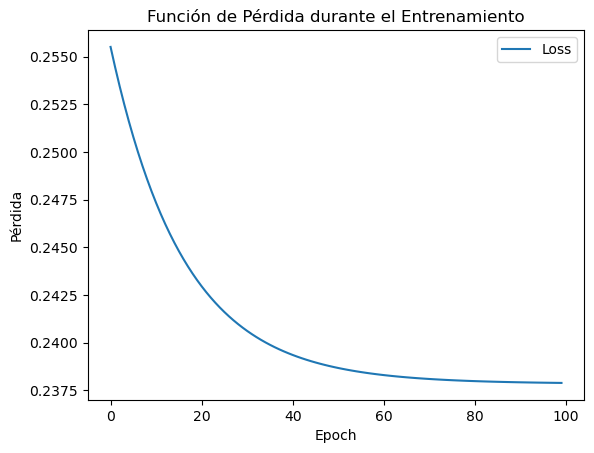

In [288]:
# Graficar la función de pérdida
plt.plot(h_loss, label='Loss')
plt.xlabel('Epoch')
plt.ylabel('Pérdida')
plt.title('Función de Pérdida durante el Entrenamiento')
plt.legend()
plt.show()